In [5]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split

import seaborn as sns

train = pd.read_csv('data/train.csv')

to_delete_var = ['qa_id', 'url',
                 'question_user_name', 'question_user_page',
                 'answer_user_name', 'answer_user_page']

# Exploration empirique des données selon les valeurs des targets
i=11

data = train.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,i]].drop(to_delete_var, 1)
data.sort_values(by=train.columns[i]).head()

X_train = train.iloc[:, :11].drop(to_delete_var, 1)
y_train = train.iloc[:, 11:]

y_train_transformed = y_train.apply(lambda x: pd.cut(x,
                                                     [-0.1, .25, .5, .75, 1.1],
                                                     labels=['low', 'medium-', 'medium+', 'high']))

In [36]:
train_question_title

0        68
1       108
2        56
3        37
4        44
       ... 
6074     36
6075     54
6076     50
6077     40
6078     76
Name: question_title, Length: 6079, dtype: int64

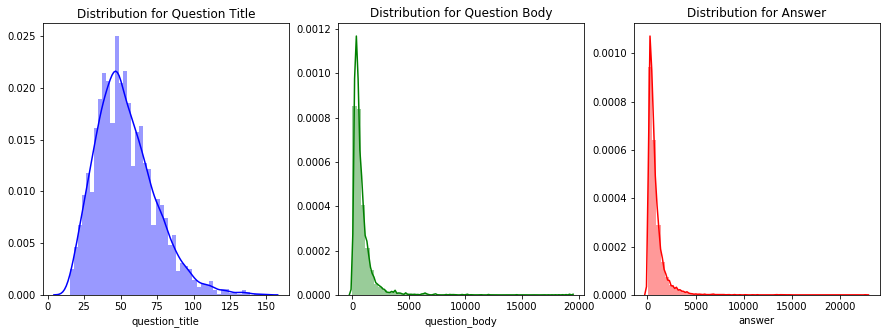

In [6]:
train_question_title=X_train['question_title'].str.len()
train_question_body=X_train['question_body'].str.len()
train_answer=X_train['answer'].str.len()
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,5))
sns.distplot(train_question_title,ax=ax1, color='blue')
sns.distplot(train_question_body,ax=ax2,color='green')
sns.distplot(train_answer,ax=ax3,color='red')

ax1.set_title('Distribution for Question Title')
ax2.set_title('Distribution for Question Body')
ax3.set_title('Distribution for Answer')

plt.show()

In [7]:
# Duplicate Questions
print("Number of duplicate questions in descending order")
X_train.groupby('question_title').count()['host'].sort_values(ascending=False).head(25)

Number of duplicate questions in descending order


question_title
What is the best introductory Bayesian statistics textbook?                        12
What does mathematics have to do with programming?                                 11
Important non-technical course for programmers?                                    11
How to prevent the "Too awesome to use" syndrome                                    9
Another instructor is pushing me out of the classroom right after my class ends     7
No sound in Ubuntu except at log in                                                 7
How do I deal with a slow and undedicated colleague in the team?                    7
What are the benefits of owning a physical book?                                    7
House rules to make the cloister less of a game winning tile in Carcassonne?        6
Making sure that you have comprehended a concept                                    6
hide javascript/jquery scripts from html page?                                      6
What is the best place to start Warhamm

In [8]:
train[train.question_title == 'What is the best introductory Bayesian statistics textbook?']

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
229,366,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"""Bayesian Core: A Practical Approach to Comput...",gappy,https://stats.stackexchange.com/users/30,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,0.777778,0.666667,1.000000,1.000000,0.933333,0.0,0.0,0.000000,1.000000
1616,2536,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I am now reading : From Algorithm to Z-Scores:...,Fabio,https://stats.stackexchange.com/users/40316,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,0.555556,0.444444,1.000000,0.888889,0.666667,0.0,0.0,0.000000,0.777778
1647,2591,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"My favorite is ""Bayesian Data Analysis"" by Gel...",Shane,https://stats.stackexchange.com/users/5,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,0.888889,0.888889,0.666667,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
2104,3349,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I have read some parts of A First Course in Ba...,George Dontas,https://stats.stackexchange.com/users/339,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,0.777778,0.555556,1.000000,1.000000,0.800000,0.0,0.0,0.000000,0.888889
3476,5543,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"Sivia and Skilling, Data analysis: a Bayesian ...",denis,https://stats.stackexchange.com/users/557,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,0.833333,1.000000,0.666667,1.000000,1.000000,0.800000,0.0,0.0,0.666667,1.000000
3762,5989,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,If I had to choose a single text for a beginne...,Jim Stone,https://stats.stackexchange.com/users/26779,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.933333,0.0,0.0,1.000000,1.000000
3801,6041,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,"Take a look at ""The Bayesian Choice"". It has t...",Zen,https://stats.stackexchange.com/users/9394,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
3899,6215,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,I found an excellent introduction in Gelman an...,Jack Tanner,https://stats.stackexchange.com/users/8207,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.933333,0.0,0.0,0.333333,1.000000
4408,7003,What is the best introductory Bayesian statist...,Which is the best introductory textbook for Ba...,Shane,https://stats.stackexchange.com/users/5,Its focus isn't strictly on Bayesian statistic...,Joe,https://stats.stackexchange.com/users/1119,http://stats.stackexchange.com/questions/125/w...,SCIENCE,...,0.888889,0.777778,0.666667,1.000000,1.000000,1.000000,0.0,0.0,0.000000,1.000000
5239,8328,What is the best introductory Bayesian statist..

0       [what, am, i, losing, when, using, extension, ...
1       [what, is, the, distinction, between, a, city,...
2       [maximum, protusion, length, for, through-hole...
3          [can, an, affidavit, be, used, in, beit, din?]
4       [how, do, you, make, a, binary, image, in, pho...
                              ...                        
6074         [using, a, ski, helmet, for, winter, biking]
6075    [adjustment, to, road, bike, brakes, for, high...
6076    [suppress, 'file, truncated', messages, when, ...
6077     [when, should, a, supervisor, be, a, co-author?]
6078    [why, are, there, so, many, different, types, ...
Name: question_title, Length: 6079, dtype: object

In [9]:
# Nettoyage des données textes -- to be improved

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

stop_words = set(stopwords.words('english'))

def stop_words_filtering(txt):
    txt = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", txt)
    txt = txt.lower().split()
    txt = [m for m in txt if not m in stop_words]
    txt = " ".join(txt)
    return txt

In [10]:
X_train['question_title']=X_train['question_title'].apply(lambda x: stop_words_filtering(x))
X_train['question_body']=X_train['question_body'].apply(lambda x: stop_words_filtering(x))
X_train['answer']=X_train['answer'].apply(lambda x: stop_words_filtering(x))

In [28]:
for col in ['question_title', 'question_body', 'answer']:
    liste = []
    for txt in X_train[col]:
        liste = liste + txt.lower().split()
    
    dico={}
    for m in liste:
        if m in dico.keys():
            dico[m] += 1
        else:
            dico[m]=1

    print(pd.DataFrame({'words': list(dico.keys()),
                        'freq':list(dico.values())}).sort_values(by='freq', ascending=False).words.head(25))

1          using
78             -
86           use
35           get
32          file
271          way
23          make
47        server
960      without
226         page
270         best
81           one
250         data
341         find
46       windows
114       change
82           two
151    different
74      multiple
209        value
190         time
138     function
294       access
235            /
67        what's
Name: words, dtype: object
631       gt;
616         ;
608         =
15          ,
101         .
16      would
141       i'm
17       like
1905        1
50        one
668         :
72      using
18        get
469         -
440       use
395       new
38       want
317         0
1320        2
603       lt;
1147        /
255      know
140       way
1424        +
182     could
Name: words, dtype: object
247         ,
261         =
210         .
408         ;
276       gt;
126       use
26          -
94      would
702       one
1721        1
254      like
415       get
28 

In [30]:
#Ajout de la features nombre de mots en communs question/réponse

def n_common_words(txt1, txt2):
    count=0
    for x in set(txt1.lower().split()):
        if x in set(txt2.lower().split()):
            count += 1
    return count

X_train['n_common_q_a_words'] = X_train.apply(lambda row: n_common_words(row.question_body,row.answer), axis=1)

In [44]:
X_train['question_title_len'] = X_train['question_title'].str.len()
X_train['question_body_len'] = X_train['question_body'].str.len()
X_train['answer_len'] = X_train['answer'].str.len()